In [260]:
##Library and data
import pandas as pd
CPI = pd.read_csv("data/cpi.csv", header=0).dropna()
EXR = pd.read_csv("data/exchange_rate.csv", header=0).dropna()

# EXR & CPI

In [261]:
print(CPI)

    half_year                  level_1    value
0     1993-H1   All Items - Lowest 20%   62.594
1     1993-H1   All Items - Middle 60%   67.942
2     1993-H1  All Items - Highest 20%   72.359
3     1993-H2   All Items - Lowest 20%   63.016
4     1993-H2   All Items - Middle 60%   68.445
..        ...                      ...      ...
157   2019-H1   All Items - Middle 60%  100.408
158   2019-H1  All Items - Highest 20%  100.679
159   2019-H2   All Items - Lowest 20%   98.350
160   2019-H2   All Items - Middle 60%  100.672
161   2019-H2  All Items - Highest 20%  100.927

[162 rows x 3 columns]


In [262]:
CPI_mean = CPI.groupby('half_year').mean()
CPI_mean.head()

,value
half_year,
1993-H1,67.631667
1993-H2,68.649667
1994-H1,70.069667
1994-H2,71.511667
1995-H1,71.732000


In [263]:
print(EXR)

          date   value
0     02/01/91  1.7495
1     03/01/91  1.7370
2     04/01/91  1.7426
3     07/01/91  1.7546
4     08/01/91  1.7597
...        ...     ...
7747  11/11/20  1.3493
7748  12/11/20  1.3498
7749  13/11/20  1.3479
7750  14/11/20  1.3483
7751  16/11/20  1.3472

[7752 rows x 2 columns]


In [264]:
def discard_date(string):
    splits = string.split('/')
    year = splits[2]
    month = splits[1]
    half_year = 'H1'
    
    if(int(year) <= 20):
        year = '20' + str(year)
    else:
        year = '19' + str(year)
    
    if(int(month) > 6):
        half_year = 'H2'
    
    return year + '-' + half_year

#Change the date format in EXR (date/month,year) into CPI date format (year-half_year)
EXR['date'] = EXR['date'].apply(discard_date) 
EXR = EXR.groupby('date').mean()

#Change the name in the column 
EXR.index.names = ["half_year"]
EXR = EXR.rename(columns={'value':'exchange_rate'})
CPI_mean = CPI_mean.rename(columns={'value':'CPI'})

print(EXR)
print(CPI_mean)

           exchange_rate
half_year               
1991-H1         1.754376
1991-H2         1.697900
1992-H1         1.640049
1992-H2         1.615250
1993-H1         1.630887
1993-H2         1.597829
1994-H1         1.567529
1994-H2         1.485443
1995-H1         1.418135
1995-H2         1.414817
1996-H1         1.410565
1996-H2         1.408057
1997-H1         1.427177
1997-H2         1.541633
1998-H1         1.656031
1998-H2         1.684598
1999-H1         1.707627
1999-H2         1.680994
2000-H1         1.709971
2000-H2         1.738769
2001-H1         1.782770
2001-H2         1.801181
2002-H1         1.817832
2002-H2         1.762500
2003-H1         1.746404
2003-H2         1.736794
2004-H1         1.698353
2004-H2         1.680791
2005-H1         1.646894
2005-H2         1.680825
2006-H1         1.607322
2006-H2         1.569253
2007-H1         1.528190
2007-H2         1.484900
2008-H1         1.386207
2008-H2         1.441219
2009-H1         1.491980
2009-H2         1.415859


In [265]:
merged = pd.merge(EXR, CPI_mean, on='half_year')
merged.corr()

,exchange_rate,CPI
exchange_rate,1.000000,-0.756073
CPI,-0.756073,1.000000


In [266]:
merged

,exchange_rate,CPI
half_year,,
1993-H1,1.630887,67.631667
1993-H2,1.597829,68.649667
1994-H1,1.567529,70.069667
1994-H2,1.485443,71.511667
1995-H1,1.418135,71.732000
1995-H2,1.414817,72.036667
1996-H1,1.410565,72.520000
1996-H2,1.408057,73.059000
1997-H1,1.427177,73.891000


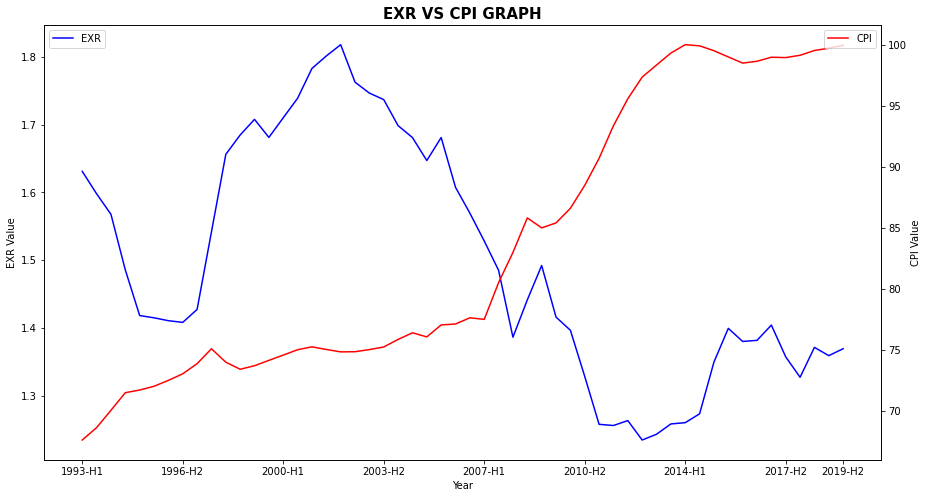

In [267]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
EXR_plot = ax.plot(merged['exchange_rate'], color='blue', label='EXR')
plt.legend(loc='upper left')

ax2 = ax.twinx()
ax2.plot(merged['CPI'], color='red', label='CPI')   
plt.legend(loc='upper right')

ax.set(xlabel='Year', ylabel='EXR Value')
ax2.set(ylabel='CPI Value')
plt.title('EXR VS CPI GRAPH', fontdict={'fontweight':'bold','fontsize':15})
plt.xticks(merged.index[::7].tolist()+['2019-H2'])  #x-axis
plt.show()

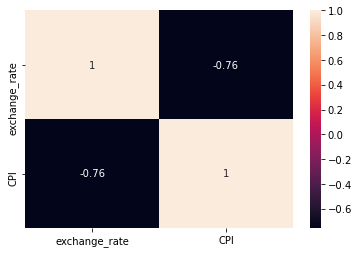

In [268]:
import seaborn as sns
sns.heatmap(merged.corr(), annot=True)

# EXR & GDP GROWTH  

In [269]:
EXR.head() #use the same EXR data

,exchange_rate
half_year,
1991-H1,1.754376
1991-H2,1.697900
1992-H1,1.640049
1992-H2,1.615250
1993-H1,1.630887


In [270]:
#Adding GDP data
gdp=pd.read_csv("data/gdp.csv").dropna() 
gdp_quarter = gdp.groupby('quarter').mean()

#Group the quartil into half_year by mean
def discard_date1(string):
    splits = string.split('-')
    year = splits[0]
    quartil = splits[1]
    half_year = 'H1'
    
    if(str(quartil) == 'Q3' or str(quartil) == 'Q4'):
        half_year = 'H2'
    
    return year + '-' + half_year

gdp['quarter'] = gdp['quarter'].apply(discard_date1)
gdp = gdp.groupby('quarter').mean()

#Rename the column
gdp.index.names = ["half_year"]
gdp = gdp.rename(columns={'value':'GDP'})
gdp

,GDP
half_year,
1976-H1,7.80
1976-H2,7.10
1977-H1,6.90
1977-H2,6.80
1978-H1,5.90
...,...
2018-H1,4.85
2018-H2,2.05
2019-H1,0.60


In [271]:
# Since EXR different with EXR growth so 
#need to change to EXR Growth for the correlation 
#Now it's still wrong
#import numpy as np
#def calc_exchange_rate_growth(exc_rate):
#    growth = []
#    growth.append(np.nan)
#    for i in range(len(exc_rate)):
#        if(i  < len(exc_rate) - 1):
#            delta = exc_rate[i+1] - exc_rate[i]
#            percentage = (delta / exc_rate[i]) * 100
#            growth.append(percentage)
        
#    return np.array(growth)
#print(EXR)

In [272]:
#Grouping EXR and GDP
EXR_GDP = pd.merge(EXR,gdp, on='half_year')
EXR_GDP.head()

,exchange_rate,GDP
half_year,,
1991-H1,1.754376,6.45
1991-H2,1.697900,6.90
1992-H1,1.640049,5.55
1992-H2,1.615250,7.70
1993-H1,1.630887,10.65


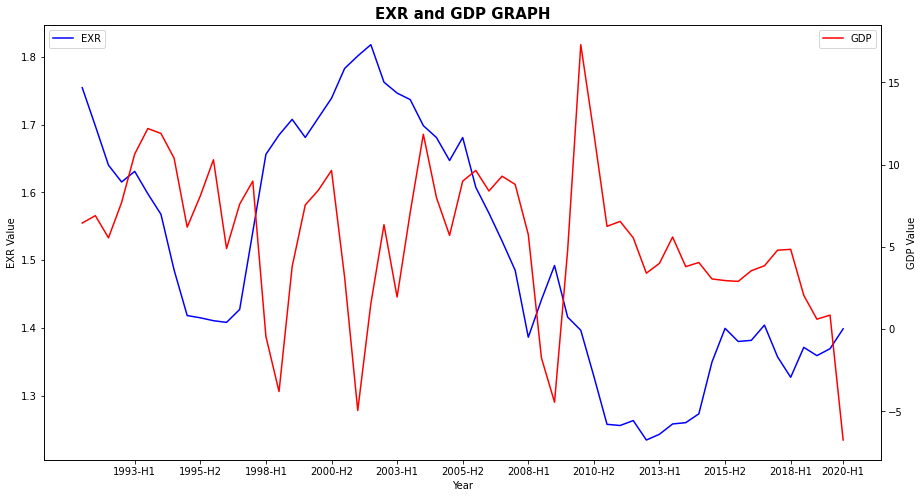

In [273]:
fig,ax = plt.subplots(figsize=(15,8))
EXR_plot = ax.plot(EXR_GDP['exchange_rate'], color='blue', label='EXR')
plt.legend(loc='upper left')

ax4 = ax.twinx()
ax4.plot(EXR_GDP['GDP'], color='red', label='GDP')   
plt.legend(loc='upper right')

ax.set(xlabel='Year', ylabel='EXR Value')
ax4.set(ylabel='GDP Value')
plt.title('EXR and GDP GRAPH', fontdict={'fontweight':'bold','fontsize':15})
plt.xticks(merged.index[::5].tolist()+['2020-H1'])  #x-axis
plt.show()

In [274]:
EXR_GDP.corr()

,exchange_rate,GDP
exchange_rate,1.000000,0.054232
GDP,0.054232,1.000000


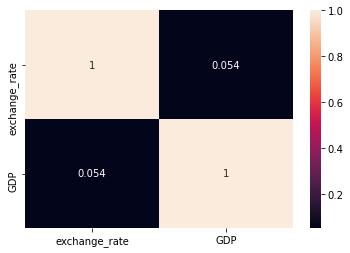

In [275]:
sns.heatmap(EXR_GDP.corr(), annot=True)

# EXR & INFLATION

In [276]:
#adding data inflation
inflation_cp = pd.read_excel("data/infl_interest.xlsx", header=0).dropna()
inflation_cp

,Country Name,Country Code,Series Name,Series Code,1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Singapore,SGP,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1.76101,2.08076,19.6367,22.3684,2.53653,-1.84189,...,5.247793,4.575603,2.358604,1.025148,-0.522618,-0.532269,0.576260,0.438620,0.565261,..
1,Singapore,SGP,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,12.4138,13.3156,10.6026,6.1176,3.98169,7.43718,...,6.337871,4.461609,4.837299,3.938003,2.988521,3.243474,4.336605,3.438111,0.733310,..
2,Singapore,SGP,Lending interest rate (%),FR.INR.LEND,..,..,..,..,..,..,...,5.380000,5.380000,5.380000,5.350000,5.350000,5.350000,5.280000,5.330000,5.250000,5.25
3,Singapore,SGP,Real interest rate (%),FR.INR.RINR,..,..,..,..,..,..,...,4.281050,4.886795,5.856076,5.634826,2.221784,4.622536,2.432034,2.173523,5.150248,..
4,Singapore,SGP,Real effective exchange rate index (2010 = 100),PX.REX.REER,..,..,..,..,..,..,...,105.174921,110.044835,112.024316,111.314061,108.323834,108.103366,106.812936,106.198685,106.308014,..
5,Singapore,SGP,Consumer price index (2010 = 100),FP.CPI.TOTL,31.2616,31.9121,38.1786,46.7186,47.9036,47.0213,...,105.247793,110.063514,112.659477,113.814403,113.219589,112.616956,113.265923,113.762730,114.405786,..
6,United States,USA,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,4.29277,3.27228,6.17776,11.0548,9.14315,5.74481,...,3.156842,2.069337,1.464833,1.622223,0.118627,1.261583,2.130110,2.442583,1.812210,..
7,United States,USA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.29336,5.2589,5.64572,-0.540547,-0.205464,5.38814,...,1.550836,2.249546,1.842081,2.451973,2.880910,1.567215,2.217010,2.927323,2.333577,..
8,United States,USA,Lending interest rate (%),FR.INR.LEND,5.72333,5.24833,8.02167,10.7983,7.8625,6.84,...,3.250000,3.250000,3.250000,3.250000,3.260000,3.511667,4.096667,4.904167,5.282500,..
9,United States,USA,Real interest rate (%),FR.INR.RINR,0.622615,0.887218,2.40973,1.65107,-1.28143,1.26689,...,1.137338,1.307083,1.469299,1.332892,2.167481,2.391984,2.154929,2.485817,3.478200,..


In [277]:
#take Inflation, consumer prices (annual %) of SGP and USA 
#since year 2020 is null information. It's also being drop.
inflation_cp = inflation_cp.drop(['Country Name','Series Code','Series Name','Country Code','2020 [YR2020]'], axis=1)
inflation_cp = inflation_cp.drop([1,2,3,4,5,7,8,9,10,11])
#Transpose column and row (so the data has the same format with EXR)
inflation_cp = inflation_cp.transpose()
#Apply the index name Year
inflation_cp.index.names = ['Year']
#Rename the columns with the Country
inflation_cp = inflation_cp.rename(columns={int(0):str('SGP Inflation')})
inflation_cp = inflation_cp.rename(columns={int(6):str('USA Inflation')})
inflation_cp

,SGP Inflation,USA Inflation
Year,,
1971 [YR1971],1.76101,4.29277
1972 [YR1972],2.08076,3.27228
1973 [YR1973],19.6367,6.17776
1974 [YR1974],22.3684,11.0548
1975 [YR1975],2.53653,9.14315
1976 [YR1976],-1.84189,5.74481
1977 [YR1977],3.16395,6.50168
1978 [YR1978],4.87254,7.63096
1979 [YR1979],4.07647,11.2545


In [278]:
# Change Year into number only. Since it's index using map instead of apply
def discard_year(string):
    splits = string.split(' ')
    year = splits[0]
    YR = splits[1]
    
    if(str(YR) == str([year])): print(year)
    return year

inflation_cp.index = inflation_cp.index.map(discard_year)
inflation_cp = inflation_cp.drop(['USA Inflation'], axis=1)
inflation_cp.tail()

,SGP Inflation
Year,
2015,-0.522618
2016,-0.532269
2017,0.57626
2018,0.43862
2019,0.565261


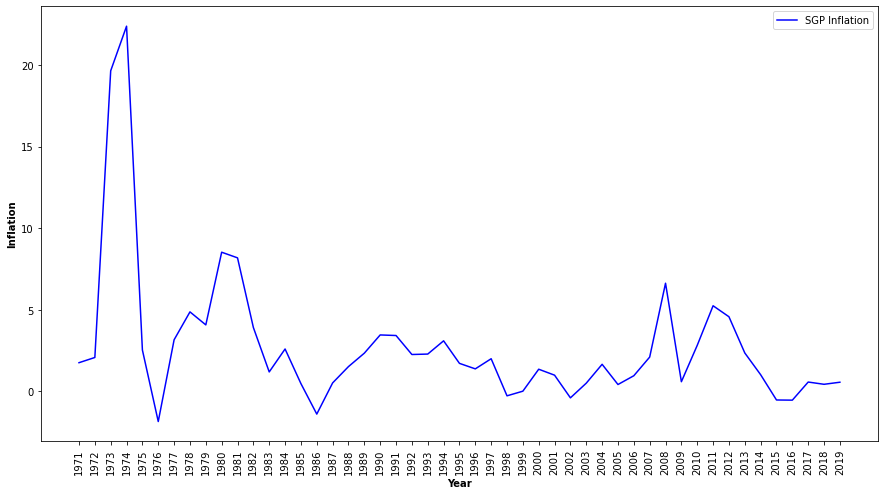

In [279]:
#The graph show the USA and SGP Inflation, Consumer Prices (annual %) from 1971 to 2019.
fig,ax = plt.subplots(figsize=(15,8))
plt.plot(inflation_cp['SGP Inflation'], color='blue', label='SGP Inflation')
#plt.plot(inflation_cp['USA Inflation'], color='red', label='USA Inflation')   
plt.legend(loc='upper right')

plt.xlabel('Year',fontdict={'fontweight':'bold'}) 
plt.ylabel('Inflation', fontdict={'fontweight':'bold'})
#plt.title('USA and SGP Inflation', fontdict={'fontweight':'bold','fontsize':15})
plt.xticks(inflation_cp.index, rotation =90)
plt.show()

In [280]:
EXR.head()

,exchange_rate
half_year,
1991-H1,1.754376
1991-H2,1.697900
1992-H1,1.640049
1992-H2,1.615250
1993-H1,1.630887


In [281]:
def discard_date2(string):
    splits = string.split('-')
    year = splits[0]
    half_years = splits[1]
    
    return year
EXR.index = EXR.index.map(discard_date2)
EXR = EXR.groupby('half_year').mean()
EXR.index.names = ["Year"]
EXR

,exchange_rate
Year,
1991,1.726138
1992,1.627650
1993,1.614358
1994,1.526486
1995,1.416476
1996,1.409311
1997,1.484405
1998,1.670315
1999,1.694311


In [282]:
EXR_Inflation = pd.merge(EXR,inflation_cp , on='Year')
EXR_Inflation = EXR_Inflation.dropna()
EXR_Inflation.dtypes

exchange_rate    float64
SGP Inflation     object
dtype: object

In [283]:
EXR_Inflation["SGP Inflation"] = pd.to_numeric(EXR_Inflation["SGP Inflation"], downcast="float")
#EXR_Inflation["USA Inflation"] = pd.to_numeric(EXR_Inflation["USA Inflation"], downcast="float")
EXR_Inflation.head()

,exchange_rate,SGP Inflation
Year,,
1991,1.726138,3.425702
1992,1.627650,2.263071
1993,1.614358,2.289300
1994,1.526486,3.100133
1995,1.416476,1.720534


In [284]:
EXR_Inflation.corr()

,exchange_rate,SGP Inflation
exchange_rate,1.000000,-0.306792
SGP Inflation,-0.306792,1.000000


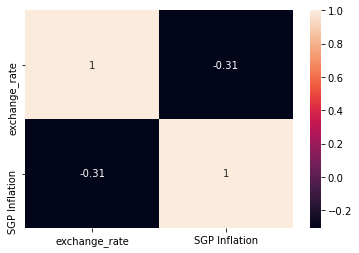

In [285]:
sns.heatmap(EXR_Inflation.corr(), annot=True)

INFLATION USING CPI data set

In [287]:
merged

,exchange_rate,CPI
half_year,,
1993-H1,1.630887,67.631667
1993-H2,1.597829,68.649667
1994-H1,1.567529,70.069667
1994-H2,1.485443,71.511667
1995-H1,1.418135,71.732000
1995-H2,1.414817,72.036667
1996-H1,1.410565,72.520000
1996-H2,1.408057,73.059000
1997-H1,1.427177,73.891000


In [289]:
cpi_values = merged['CPI'].values

def inflation(cpi_1, cpi_2):
    return ((cpi_2 - cpi_1)/cpi_1) * 100

def get_inflation_from_cpi(cpi_vals):
    inflations = []
    for i in range(cpi_vals.shape[0]):
        if(i != cpi_vals.shape[0] - 1):
            inflations.append(inflation(cpi_vals[i], cpi_vals[i+1]))
    
    inflations.append(np.nan)
    return np.array(inflations)

merged['inflation'] = get_inflation_from_cpi(cpi_values)

In [290]:
merged.dropna().corr()

,exchange_rate,CPI,inflation
exchange_rate,1.000000,-0.754991,-0.236767
CPI,-0.754991,1.000000,-0.088160
inflation,-0.236767,-0.088160,1.000000


In [292]:
merged.to_csv('data/EXR_CPI_Inflation.csv')